# **Business Problem**
**XYZ company needs a data driven approach for optimal pricing for their vehicles.**

# **Data Science Problem**
**Prediction engine that predicts the price of a vehicle based on various features like fuel type, mileage capacity, number of cylinders, horsepowers, etc.**

## **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## **Loading Data**

In [ ]:
from google.colab import files
import io

uploaded = files.upload()

Saving AutoData.csv to AutoData.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['AutoData.csv']))

## **Inspecting Data**

In [ ]:
data.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

## **Data Preprocessing**

In [ ]:
num_col = data.select_dtypes(include = np.number).columns
categ_col = data.select_dtypes(exclude = np.number).columns

print("\n Numerical Columns: ", num_col)
print("\n Categorical Columns: ", categ_col)


 Numerical Columns:  Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

 Categorical Columns:  Index(['make', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')


In [ ]:
 data = data.rename(columns = lambda x : x.strip())

In [ ]:
data.drop(['make'], axis = 1, inplace = True)

In [ ]:
cat = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

data = pd.get_dummies(data, cat, drop_first = True)

## **Data Visulaization and Exploratory Data Analysis**

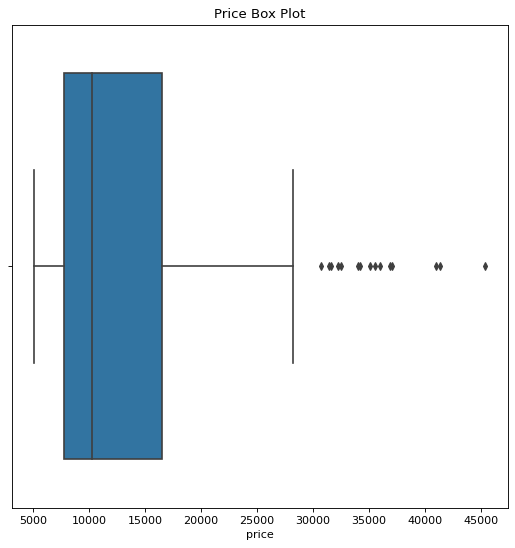

In [ ]:
#Distribution of y-variable

plt.figure(figsize = (8,8), dpi = 80)
sns.boxplot(data['price'])
plt.title('Price Box Plot')
plt.show()

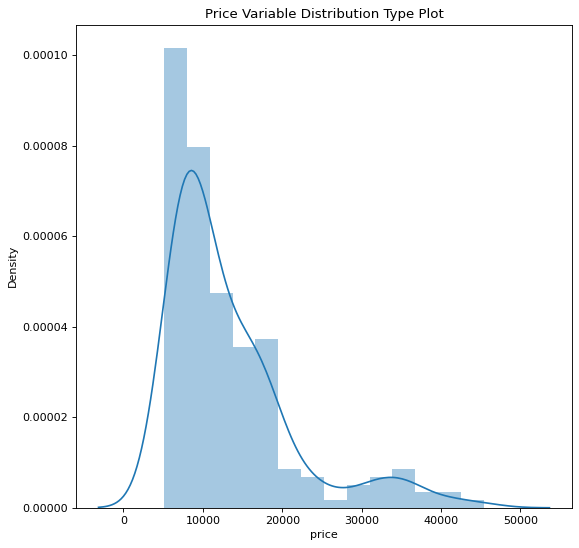

In [ ]:
 #Check distribution type of y variable

plt.figure(figsize = (8,8), dpi = 80)
sns.distplot(data['price'])
plt.title('Price Variable Distribution Type Plot')
plt.show()

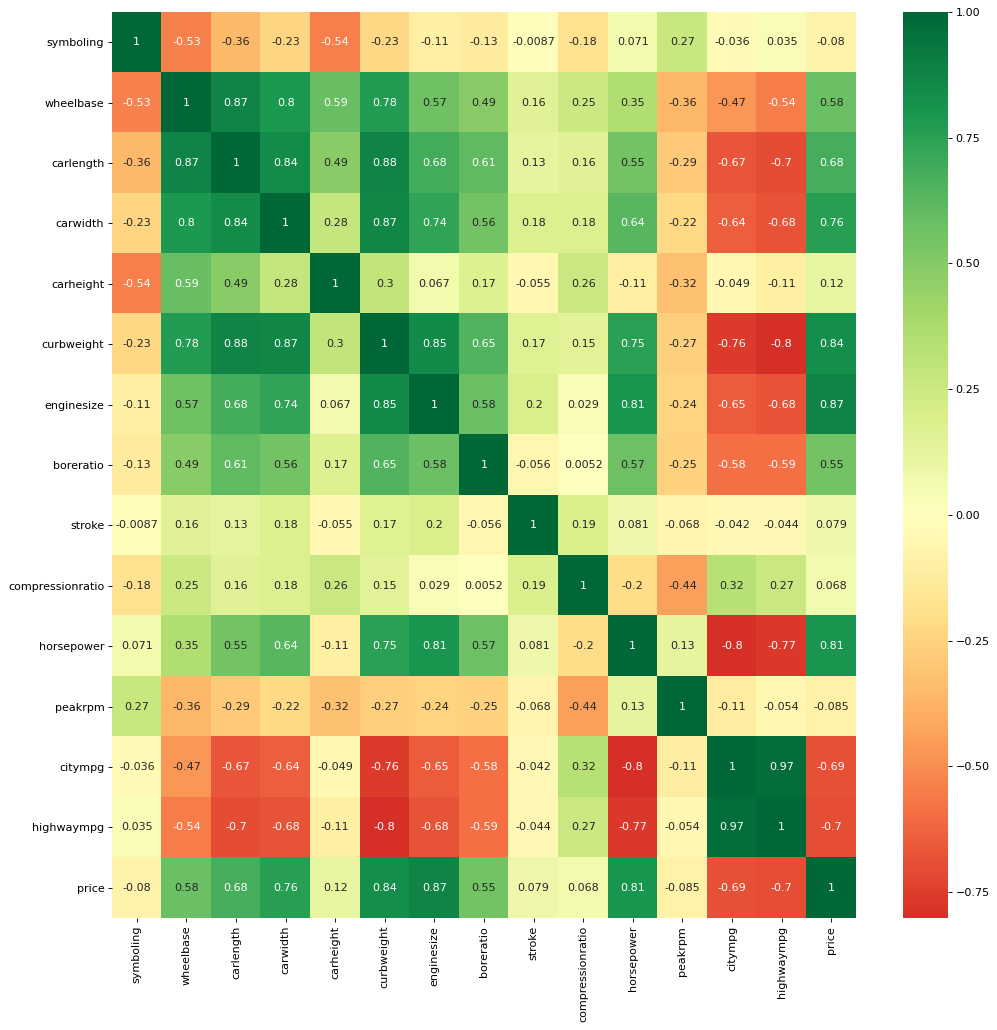

In [ ]:
plt.figure(figsize = (15, 15), dpi = 80)
p = sns.heatmap(data[num_col].corr(), annot = True, center=0, cmap = 'RdYlGn')

## **Model Building**

In [ ]:
X = data.drop(['price'], axis = 1)
y = data['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 500)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/ y_true)) * 100

## Gradient Boosting Regression
learning rate = 0.05

In [ ]:
gbr = GradientBoostingRegressor(learning_rate = 0.05, random_state=1005)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

print("R2 Score: ",r2_score(y_test, y_pred))
print("MAPE Score: ", mean_absolute_percentage_error(y_test, y_pred))

R2 Score:  0.8990386889065485
MAPE Score:  11.396639355261952


## Gradient Boosting Regression
learning rate = 0.05

In [ ]:
gbr = GradientBoostingRegressor(learning_rate = 0.1, random_state=1005)
gbr.fit(X_train, y_train)
gbr = GradientBoostingRegressor(learning_rate = 0.05, random_state=1005)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

print("R2 Score: ",r2_score(y_test, y_pred))
print("MAPE Score: ", mean_absolute_percentage_error(y_test, y_pred))

R2 Score:  0.904664941622252
MAPE Score:  10.745432515718653


## **HyperParameter Tuning**

In [127]:
gbr = GradientBoostingRegressor(random_state = 1000)

param_grid = {'n_estimators' : [600, 650, 700],
              'learning_rate' : [0.01, 0.5, 0.1],
              'max_depth' : [2, 4, 5],
              'min_samples_leaf' : [3, 5, 7]
}


grid = GridSearchCV(estimator=gbr, param_grid = param_grid, n_jobs=-1, refit=True, verbose=3)

In [128]:
#Fitting the train data on grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  2.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...one,
                        

In [129]:
print("Best Parameters: ", grid.best_params_)
y_pred = grid.predict(X_test)

print("R2 Score: ",r2_score(y_test, y_pred))
print("MAPE Score: ", mean_absolute_percentage_error(y_test, y_pred))

Best Parameters:  {'learning_rate': 0.5, 'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 700}
R2 Score:  0.9035494395991296
MAPE Score:  10.930681723792166


In [130]:
 print("Model Details: ", grid.best_estimator_)

Model Details:  GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.5, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=700,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1000, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
